In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
churn_data = pd.read_csv('/Users/zekapavlova/IDE/Skillfactory/PY-10-11 Pandas/11 Pandas/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


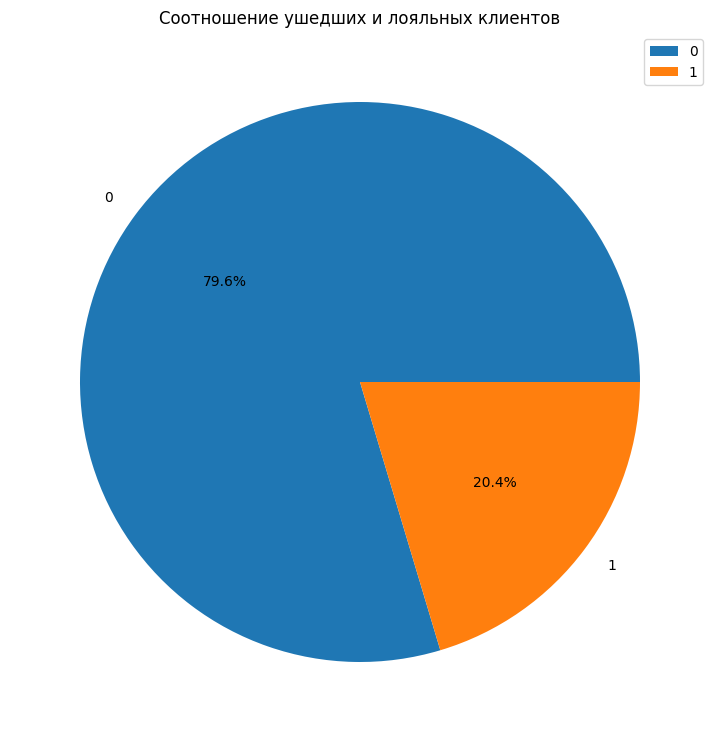

In [177]:
# Задание 9.1
# Делаем подсчет количества ушедших и лояльных клиентов. Далее сортируем по категориям.
sorted_churn_data=churn_data["Exited"].value_counts().sort_values(ascending=False)

# Строим график
fig_1=plt.figure(figsize=(7,7))  #задаем размер гарфика
ax=fig_1.add_axes((1,1,1,1))
pie=ax.pie(
    sorted_churn_data,   #датафрейм
    labels=sorted_churn_data.index,   #задаем какие показатели будут использоваться
    autopct="%1.1f%%",   #формат вывода показателя
   )  
ax.set_title("Соотношение ушедших и лояльных клиентов")   #заголовок
ax.legend()   #вывод легенды

# отображаем его
plt.show(pie)


ВЫВОД №1. Из данной круговой диаграммы видно, что процент ушедших клиентов составляет - 79,6%, а лояльных клентов - 20,4%. 
Количество ушедших клиентов в 3,9 раз больше, чем лояльных.

In [176]:
# Задание 9.2
# Вводим маску для отсева клиентов с суммой на счете менее 2500 долларов
mask=churn_data["Balance"]>2500

# Строим график
fig_2=px.histogram(
    data_frame=churn_data[mask],  #датафрейм
    x="Balance",   #ось Х
title="Распределение баланса пользователей"   #заголовок
)

# отображаем его
fig_2.show()


ВЫВОД №2. Из данного графика можно сделать следующие выводы:
   1. Увеличение количества клиентов в определенном диапазоне баланса, происходит вместе с увеличением суммы на счетах клиентов. Старт роста графика происходит с 50 тыс. долларов на балансе.
   2. При балансе в диапазоне  74-94 тыс. долларов, количество клиентов составляет 50-100 человек.
   3. При балансе в диапазоне  94-100 тыс. долларов, количество клиентов составляет 100-150 человек.
   4. Далее график уходит в пиковые значения, которые показывают, что самое большое количество клиентов (более 150 человек) имеют баланс в дипазоне от 102-134 тыс. долларов. 
   5. После гарфик идет спад количества клиентов, это происходит из-за роста суммы на счетах клиентов. Можно увидеть, что клиентов с суммой на счете 200 - 216 тыс. долларов - 28 человек, а с суммой более 216 тыс. долларов  - 4 человека.

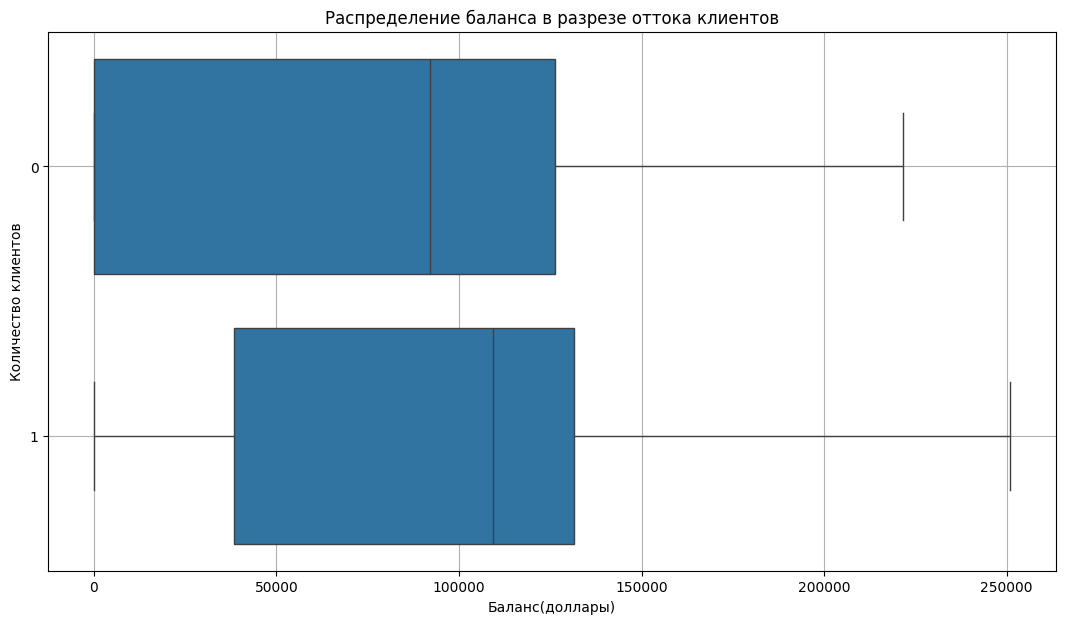

In [206]:
# Задание 9.3
# Строим график 
fig_3=plt.figure(figsize=(13,7))   #Задаем размер графика
boxplot = sns.boxplot(
    data=churn_data,   #датафрейм
    x='Balance',   #ось Х
    y='Exited',   #ось У
    orient='h',   #ориентация графика
)
boxplot.set_title('Распределение баланса в разрезе оттока клиентов')   #заголовок
boxplot.set_xlabel('Баланс(доллары)')   #заголовок оси Х
boxplot.set_ylabel('Количество клиентов')   #заголовок оси У
boxplot.grid()   #вывод сетки на графике



ВЫВОД №3. Из графика можно сделать следующие выводы:
   1.  Можно заметить, что у ушедших клиентов отсутсвут левая граница распределения и сразу начинается ящик. Ширина ящика  у ушедших клиентов колеблется от 0 до 125 тыс. долларов.
   2. У лояльных клиентов длина ящика с усами от 40 до 250 тыс. долларов.
   3. Медиана у ушедших клиентов находится на отметке 90 тыс. долларов, а у лояльных клентов - на 110 тыс.долларов. Разница среднего значения баланса составляет 20 тыс. долларов.
   4. Возможно у ушедших клиентов баланс был слишком мал, чтобы пользоваться услугами банка в полном обьеме. 

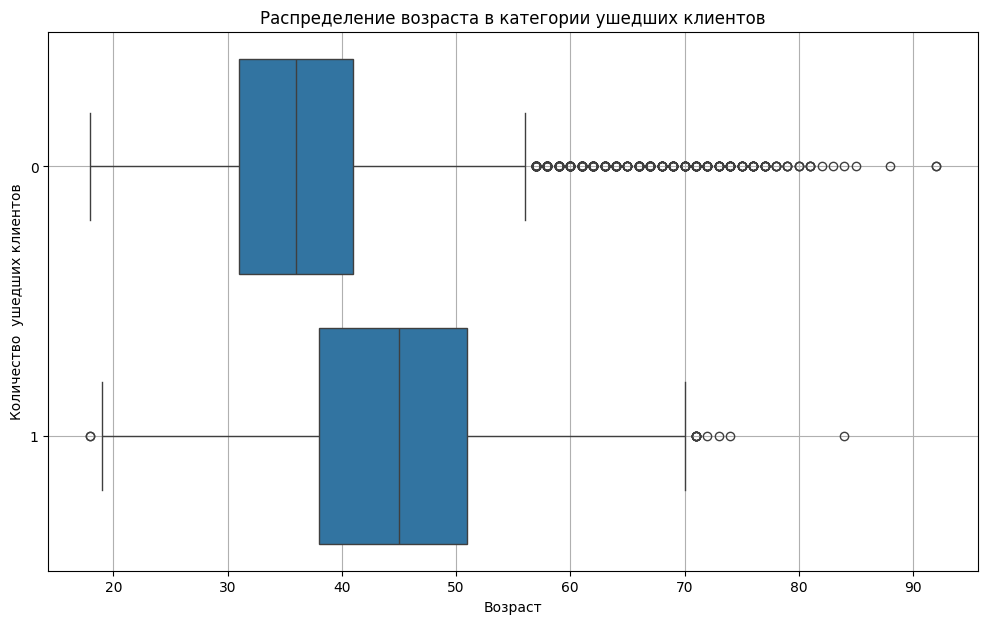

In [207]:
# Задание 9.4
#Задем параметры для построения графика
fig_4=plt.figure(figsize=(12,7)) #размер графика
boxplot = sns.boxplot(
    data=churn_data,   #датафрейм
    x='Age',   #ось Х
    y='Exited',   #ось У
    orient='h'   #ориентация графика
    )
boxplot.set_title('Распределение возраста в категории ушедших клиентов')   #заголовок
boxplot.set_xlabel('Возраст')   #заголовок оси Х
boxplot.set_ylabel('Количество  ушедших клиентов')   #заголовок оси У
boxplot.grid()   #вывод сетки на графике


ВЫВОД №4. Из графика можно сделать выводы:
   1. У категории ушедших клиентов длина ящика с усами  находится в диапазоне возраста от 16 до 57 лет. Ширина ящика от 32 до 42 лет. 
   2. У категории лояльных клиентов длина ящика с усами  находится в диапазоне возраста от 18 до 70 лет. Ширина ящика от 37 до 52 лет.
   3. Медиана у ушедших клиентов - 36 лет, а у лояльных - 45 лет. Можно сказать, что ушедшие клиенты более молодые, чем возраст клиентов, которые остаются вместе с банком.
   4. Также в категории ушедших клиентов видно, что количество выбросов больше с увеличением возраста клиента.
   5. Банку необходимо рассмотреть возрастную категорию от 25 до 36 лет и от 45 и старше. Разработать новые услуги и продукты, чтобы привлечь молодежь и людей пенсионного возраста.

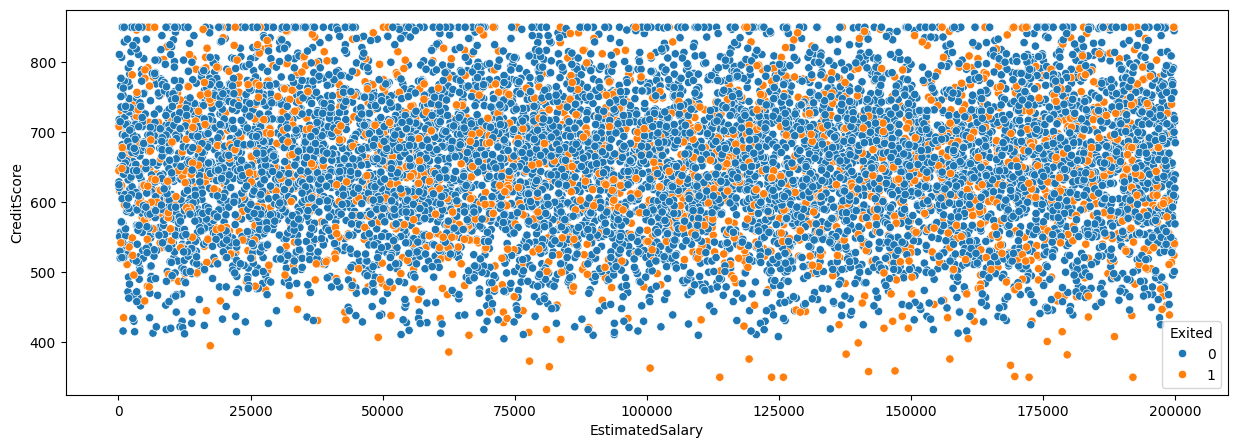

In [103]:
# Задание 9.5
#Задаем параметры для построения графика
fig_5=plt.figure(figsize=(15,5))   #размер графика
jointplot= sns.scatterplot(
    data=churn_data,   #датафрейм
    y="CreditScore",   #ось У
    x="EstimatedSalary",   #ось Х
    hue="Exited"   #признак, по которому категории выводятся на экран различными цветами
    )

#Отображаем график
plt.show()

ВЫВОД №5.На данном графике явной взаимосвязи не видно. Распределение лояльных и ушедших клиентов равномерное по всему полю гарфика.

In [137]:
# Задание 9.6
# Прозводим группировку по столбцу Пола клиентов и считаем долю ушедших клиентов через среднее значение
gender_departed=churn_data.groupby(['Gender'])['Exited'].mean()

#Задаем параметры для построения графика
fig_6 = px.bar(
    data_frame=gender_departed,   #датафрейм
    x=gender_departed.index,   #ось Х
    y='Exited',   #ось У
    color="Exited",   #к какому критерию произведена привязкапо цвету
    height=500,   #выоста
    width=500,   #ширина
    title='Распределение пола в категории ушедших клиентов',   #заголовок
)

#Отображаем график
fig_6.show()

ВЫВОД №6.Из данного графика видно, что доля ушедших клиентов(женщин) составляет - 0,25, а клиентов (мужчин) - 0,16. Из чего делаем вывод, что женщины уходят чаще, чем мужчины.

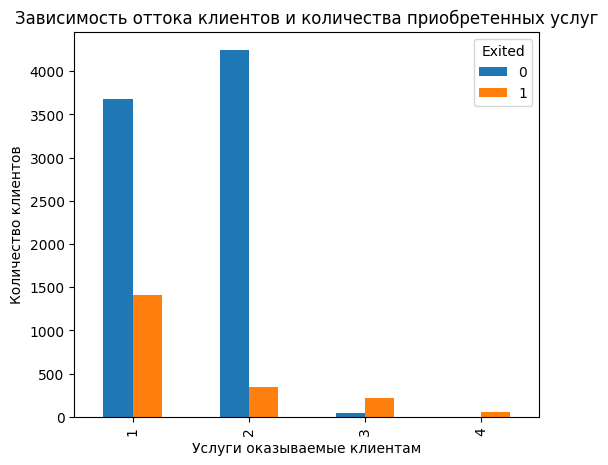

In [202]:
# Задание 9.7
#Делаем сводную таблицу, в которой отображается количество оказанных услуг банком в категориях клиентов
products_sum_departed=churn_data.pivot_table(
    values="CustomerId",   #значение в ячейках
    index='NumOfProducts',   #указываем параметр, передаваемый в строки
    columns='Exited',   #указываем параметр, передаваемый в столбцы
    aggfunc="count"   #указываем математическую функцию, применяемую к таблице
)

#Задаем параметры для построения графика
fig_7, axes=plt.subplots(figsize=(6,5))   #размер графика и координатная система
fig_7=products_sum_departed.plot(
    kind="bar",   #вид графика
    title='Зависимость оттока клиентов и количества приобретенных услуг',   #заголовок гарфика
    xlabel="Услуги оказываемые клиентам",   #ось Х
    ylabel="Количество клиентов",   #ось У
    ax=axes   #система координат
)

ВЫВОД №7. Из графика видно, что:
   1. Услуги под номерами 1 и 2 самые часто используемые у обоих категорий клиентов. Это видно по количеству клиетов, более 3500 человек у ушедших клиентов и от 400 до 1400 у лояльных клиентов.
   2. Услуга №1 самая популярная. Ею воспользовались более 5100 человек и ей продолжают пользоваться около 1400 человек, то есть 27% от всех клиентов, которые ее использовали.
   3. Можно увидеть, что услуга №2 не оправдала ожидания клиентов, так как ею воспользовались около 5000 человек, но продолжают пользоваться около 400 человек- это всго 8%.
   4. Услуги №3,4, скорей всего, предосталяются специальным категориям клиентов, которые имеют повышенный уровень обслуживание. Есть некоторое количество ушедших клиентов, которые воспрользовались услугой №3. А в предоставляемой услуге №4 ушедших клиентов - нет, скорей всего, она предоставляется эксклюзивно.

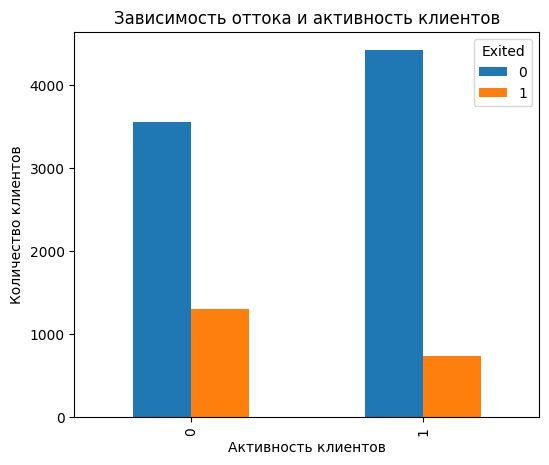

In [205]:
# Задание 9.8
#Делаем сводную таблицу, в которой отображается статус клиента (активный или нет)
active_member_departed=churn_data.pivot_table(
    values="CustomerId",   #задаем значение в ячейках
    index='IsActiveMember',   #параметр, передаваемый в строки
    columns='Exited',   #параметр, передаваемый в столбец
    aggfunc="count"   #указываем математическую функцию, применяемую к таблице
)

#Задаем параметры для построения графика
fig_8, axes=plt.subplots(figsize=(6,5))   #размер графика
fig_8=active_member_departed.plot(
    kind="bar",   #вид графика
    title='Зависимость оттока и активность клиентов',   #заголовок гарфика
    xlabel="Активность клиентов",   #Заголовок оси Х
    ylabel="Количество клиентов",   #Заголовок оси У
    ax=axes   #система координат
)

ВЫВОД №8. Из графика можно сделать следующие выводы:
   1. Рассмотрим клиентов, которые имеют или имели статус "неактивные". Общее количество  таких клиентов  составляет - около 5000 человек. Из них 1300 человек (26%) остались "лояльными".
   2. Клиенты, которые имеют или имели статус "активные" - около 5200 человек. Из них 700 человек (13,5%) остались "лояльными". То есть эти клиенты активно пользовались услугами этого банка, но большенству из них это не понравилось.
   3. Видно, что у банка проблемы с услугами, которые они предоставляют и условиями обслуживания клиентов. Необходимо пересмотреть эти напрвления для привлечения новых клиентов и более активного использования услуг постоянными клиентами.

In [93]:
# Задание 9.9
#Производим группировку по странам мира, где указываем  долю по категориям клиаентов
choropleth_data=churn_data.groupby(['Geography']) ['Exited'].mean()

#Задаем параметры для построения графика
fig_9=px.choropleth(
    data_frame=choropleth_data,   #датафрейм
    locations=choropleth_data.index,   #информация по локациям
    locationmode="country names",   #режим совпадения локаций с базой Plotly
    color="Exited",   #от чего зависит цвет
    range_color=[0,0.8],   #диапазон цвета
    title="Доля ушедших клиентов на карте мира",   #Заголовок графика
    width=800,   #ширина
    height=500,   #ширина
    color_continuous_scale="Greens"   #палитра цветов
    )

#Отображаем график
fig_9.show()

ВЫВОД №9. Доли по количеству ушедших клиентов в странах:
   1. Германия - 0.32
   2. Испания - 0.17
   3. Франция - 0.16 (Франция разбросана на 3 локациях)
   4. Возможно в Германии большой выбор Банков, которые предлагают более выгодные и дополнительные услуги. Налоги отличаются от других стран.

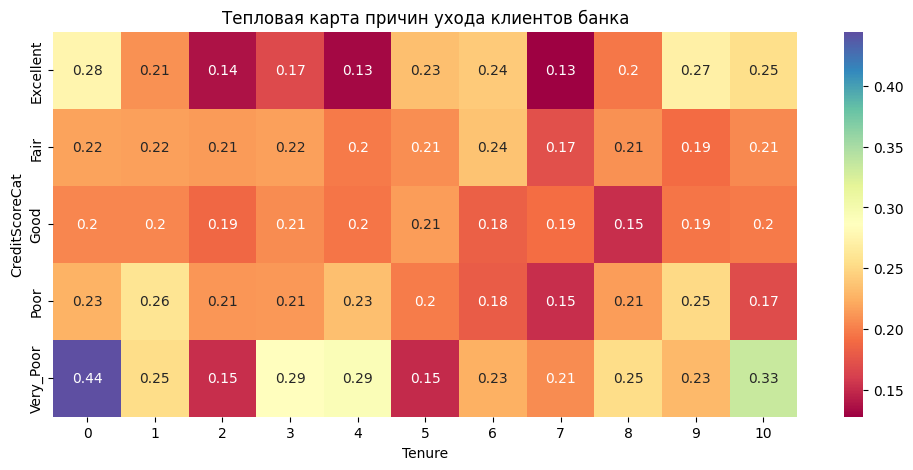

In [188]:
# Задание 9.10
#Переведем  числовой признак CreditScore в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
#Добавим новые категории в Кредитный рейтинг
churn_data["CreditScoreCat"]=churn_data["CreditScore"].apply(get_credit_score_cat)

#Создадим сводную таблицу с новыми категорями Кредитного рейтинга и сроком обслуживания в банке
active_member_departed=churn_data.pivot_table(
    values="Exited",   #значение в ячейках
    index="CreditScoreCat",   #параметр, передаваемый в строки
    columns="Tenure",   #параметр, передаваемый в столбец
    aggfunc="mean"   #указываем математическую функцию, применяемую к таблице
)

#Задаем параметры для построения графика
fig_10=plt.figure(figsize=(12,5))   #размер графика
heatmap=sns.heatmap(
    data=active_member_departed,   #цветовая карта для данных
    annot=True,   #возможность аннотировать каждую ячейку числовыми данными
    cmap="Spectral"   #цвета гарфика
)
heatmap.set_title("Тепловая карта причин ухода клиентов банка")   #заголовок гарфика

#Отображаем его
plt.show(heatmap)

ВЫВОД №10.Выводы:
   1. Самая большая доля уходящих клиентов находится в категории Кредитного рейтинга - "очень Бедные". Максимальная доля ушедших приходится на 0 год - 0,44, 10 год - 0,33, 3,4 годы - 0,29. Скорей всего, для этой категории самые невыгодные условия обслуживания.
   2. В категории  "Бедные" доля ушедших по по годам от 0 до 5 лет, а также на 8 и 9 годы, колеблется от 0,26 до 0,2. Минимальная доля ушедших от 0,15 до 0,18 - это 6,7 и 10 годы. Видна тенденция к снижению доли ушедших в зависомсти от количества лет, которые он сотрудничает с банком.
   3.В категории Кредитного рейтинга "Добросовестный" доля ушедших по всем годам не превышает - 0,21. Минимальная доля ушедших от 0,15 до 0,18 - это 6,8 годы. Видно, что при использовании услугами 10 лет доля ушедших клиентов не имеет большого разсброса.
   4. В категории Кредитного рейтинга "Добросовестный" доля ушедших по всем годам колеблется 0,19 - 0,24, это выше, чем в предыдущей категории рейтинга.  Можно предположить, что имея более высокий Кредитный рейтинг, клиенты уходят из-за более выгодный условий в других банках.
   5. Максимальная  доля уходящих клиентов в категории Кредитного рейтинга - "Великолепный" приходится на 0 год - 0,28 и 9,10 годы - 0,27 и 0,25. Это может сказать о том, что только прийдя в банк - не устраивают услуги или условия, которые он предоставляет. Или наоборот находясь клиентом длительное время, они хотели бы получать более индивидуальные и экслюзивные услуги. Возможно ни их получают, но в других банках они лучше.
